<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/02_neural_netwrok_model_for_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usually There type fo classificaiton
1. Binary Classification
2. Multiclass classification
3. Multilabel Classification


In [2]:
# Lets get the data for calssisfication

from sklearn.datasets import make_circles

In [3]:
#samples 
n_samples=1000

#create data 
X,y = make_circles(n_samples,noise=0.03)


In [4]:
X,y

(array([[ 0.48908746, -0.68181471],
        [ 0.51727246, -0.63410993],
        [ 0.78425579, -0.19997562],
        ...,
        [ 1.03041479, -0.02965706],
        [-0.6613374 , -0.44951063],
        [ 0.2002521 ,  0.95930472]]),
 array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 

In [5]:
import pandas as pd
circle_data = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circle_data.head()

,X0,X1,Label
0,0.489087,-0.681815,1
1,0.517272,-0.634110,1
2,0.784256,-0.199976,1
3,0.524402,-0.801876,0
4,0.681828,0.326342,1


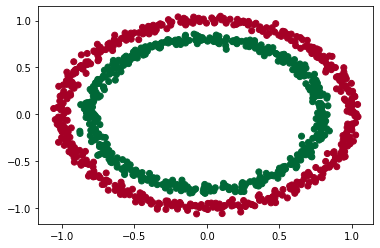

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)

In [7]:

X_data = circle_data.drop('Label', axis=1)
y_data = circle_data["Label"]

X_data.head(), y_data.head()

(         X0        X1
 0  0.489087 -0.681815
 1  0.517272 -0.634110
 2  0.784256 -0.199976
 3  0.524402 -0.801876
 4  0.681828  0.326342, 0    1
 1    1
 2    1
 3    0
 4    1
 Name: Label, dtype: int64)

In [8]:

#Lets split the model for train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(800, 200)

In [9]:


import tensorflow as tf

In [10]:
# Lets create a model.
tf.random.set_seed(42)

# Create a model with one hidden layer
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)

])

# Comiple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model.

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 4.3156 - accuracy: 0.4725
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2508 - accuracy: 0.4437
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2093 - accuracy: 0.4350
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1903 - accuracy: 0.4325
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1716 - accuracy: 0.4275
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1657 - accuracy: 0.4263
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1346 - accuracy: 0.4225
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0986 - accuracy: 0.4175
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0789 - accuracy: 0.4175
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0718 - accuracy: 0.4162
Epoch 11/

# what ??? Just 48 % accuracy.
  Need to add change hyper parameters

In [11]:
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

])

#compile a model

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# foit the model

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4.4142 - accuracy: 0.4512
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2501 - accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1192 - accuracy: 0.4600
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9322 - accuracy: 0.4625
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 3.5578 - accuracy: 0.4625
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 3.1540 - accuracy: 0.4688
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 2.2006 - accuracy: 0.4762
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8557 - accuracy: 0.4750
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7879 - accuracy: 0.4787
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7618 - accuracy: 0.4800
Epoch 11/

In [12]:
#Still 50 % lets add one more hidden layer of 100 neurons.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 2.6603 - accuracy: 0.4400
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.5088
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.5200
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5050
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5100
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.5275
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.4613
Epoch 11/

In [13]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4800


[0.6936008930206299, 0.47999998927116394]

In [14]:
# Lets add the activation function with 2 hidden layers and learning rate as 0.001

In [15]:
tf.random.set_seed(42)

# Create a model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model

history_4 = model_4.fit(X_train,y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4900
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5100
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5175
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5275
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5225
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6818 - accuracy: 0.5325
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5350
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5425
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5387
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5437
Epoch 11/

In [16]:
model_4.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.0908 - accuracy: 0.9950


[0.09077568352222443, 0.9950000047683716]

In [17]:
# lets try that model to learn faster.

In [18]:
tf.random.set_seed(42)
# create a model
model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

#fit the model
history_5=model_5.fit(X_train,y_train,epochs=25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5138
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5362
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.5550
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.5738
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.6137
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.7038
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.7550
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.8450
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.9187
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.9638
Epoch 11/25
25/25 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9950


[0.03915180265903473, 0.9950000047683716]

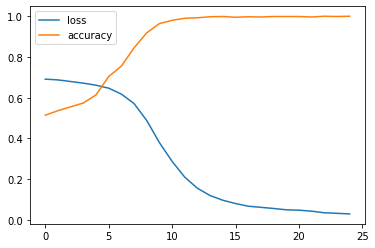

In [19]:
pd.DataFrame(history_5.history).plot()
model_5.evaluate(X_test,y_test)


**Learning Rate effect:**

So just by increasing the learning rate by 10% we are able to trian the model in 1/10th of epochs. 



#Confusion matrix

In [20]:
y_pred = model_5.predict(X_test)

model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9950


[0.03915180265903473, 0.9950000047683716]

In [21]:
tf.math.confusion_matrix(y_test,y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[106,   0],
       [ 94,   0]], dtype=int32)>

Now this is showing very high false negative case. However accuracy is quite high

**Are we missing some thing?**

In [22]:
y_pred, y_test


(array([[9.96610880e-01],
        [9.98524129e-01],
        [9.99044001e-01],
        [9.89244878e-01],
        [1.74764901e-01],
        [9.95109618e-01],
        [1.68004632e-03],
        [9.67416465e-01],
        [1.24388933e-03],
        [1.82901621e-02],
        [1.87754631e-03],
        [9.95628476e-01],
        [9.88482296e-01],
        [2.65570879e-02],
        [9.97949779e-01],
        [9.86610651e-01],
        [9.89385724e-01],
        [9.92771029e-01],
        [4.88653779e-03],
        [2.66830623e-02],
        [9.99763787e-01],
        [7.89673328e-02],
        [9.98938918e-01],
        [2.86489725e-04],
        [9.72360015e-01],
        [2.01068103e-01],
        [6.52518868e-03],
        [9.94592845e-01],
        [9.90350783e-01],
        [9.84603643e-01],
        [1.77073479e-03],
        [8.53591084e-01],
        [9.89894032e-01],
        [9.99123275e-01],
        [1.60238147e-03],
        [1.13445520e-03],
        [2.82407582e-01],
        [4.57638502e-03],
        [9.9

So one is having probability and other is in binary. Cool

In [23]:
y_pred = tf.round(y_pred)
y_pred

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
 

In [24]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[105,   1],
       [  0,  94]], dtype=int32)>

Now it make sense

#Lets work on larger data sets
* work on fashion data set from keras for multiclass classificaiton

In [25]:
import tensorflow as tf

fashion_data = tf.keras.datasets.fashion_mnist
# Data is already split in train and test 
(X_train,y_train),(X_test ,y_test) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


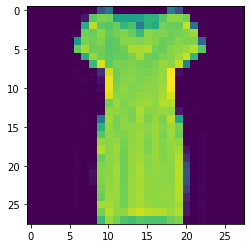

label : 3


In [26]:
import matplotlib.pyplot as plt

plt.imshow(X_train[20])
plt.show()

print("label : {}".format(y_train[20]))



In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
# Lets check the shape of training data.

X_train[0].shape

(28, 28)

In [39]:
# Lets buid the model .

#set random seed 

tf.random.set_seed(42)

# Crete a model

model_6=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

])

model_6.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1671 - accuracy: 0.1606
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7066 - accuracy: 0.2509
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6321 - accuracy: 0.2806
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6052 - accuracy: 0.2833
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5975 - accuracy: 0.2862
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5950 - accuracy: 0.2920
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5775 - accuracy: 0.3040
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5708 - accuracy: 0.3175
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5638 - accuracy: 0.3280
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.543